# Import Libraries

In [1]:
using DataFrames
using DataFramesMeta

using PyCall
using Statistics
using PlotlyJS
using TimeSeries
using Random
using Distributions

include("GenerateSyntheticData.jl")

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


getTestData

# Generate Synthetic Test Data

In [2]:
@pyimport statsmodels.discrete.discrete_model as DiscreteModel
@pyimport statsmodels.tools.tools as Tools 

X, y = getTestData(nFeatures=40, nInformative=5, nRedundant=30, nSamples=10_000, sigmaStd=1.0);
size(X), size(y)

((10000, 40), (10000, 1))

# Logistic Regression Fit

In [3]:
y_, X_ = y |> Matrix, X |> Matrix
ols = DiscreteModel.Logit(y_, X_)
result = ols.fit()

pvalues = DataFrame("FeatureName"=>names(X), "PValue"=>result.pvalues);

In [4]:
sort!(pvalues, "PValue", rev=true)

,FeatureName,PValue
,String,Float64
1,R_19,0.967574
2,R_1,0.954915
3,R_26,0.848831
4,R_27,0.805896
5,I_5,0.800713
6,N_3,0.789331
7,N_5,0.758302
8,R_15,0.743527
9,I_3,0.741512


# Plot Results

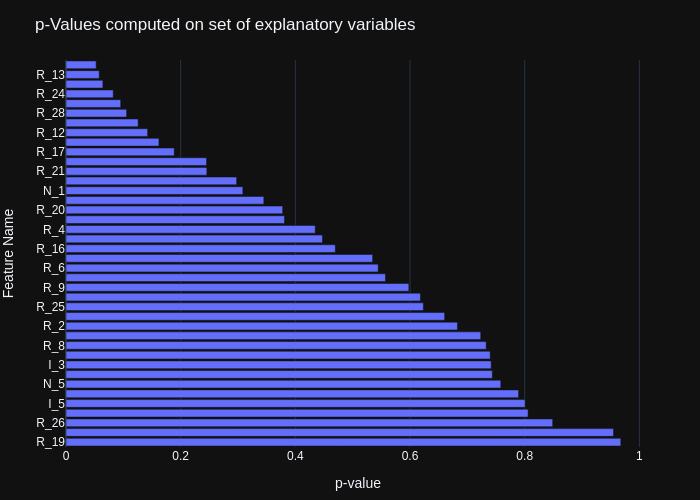

In [5]:
templates.default = "plotly_dark";
PlotlyJS.templates

toSavePlot = plot(
    bar(
        pvalues,
        x=:PValue,
        y=:FeatureName,
        orientation="h",
        )
    ,
    PlotlyJS.Layout(
        title="p-Values computed on set of explanatory variables",
        width=800, height=1200,
        xaxis_title="p-value",
        yaxis_title="Feature Name",
    )
)

# Save Results

In [7]:
PlotlyJS.savefig(toSavePlot, "Figs/p_values_on_set_of_explanatory_variables.png")

"Figs/p_values_on_set_of_explanatory_variables.png"